<a href="https://colab.research.google.com/github/pamelasschlegel/Data-Wrangling-Finding-False-Records/blob/main/Data_Wrangling_Hotel_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Wrangling - Finding Fraudulent Hotel Bookings**

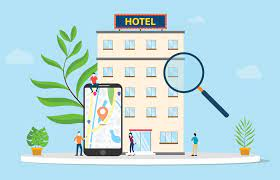


##Howie's Hotel Chain is under suspicion of money laundering. 

##Using their hotel booking records, locate and flag the fradulent hotel bookings. 





In [1]:
# Importing necessary packages for analysis

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the csv and creating a pandas DataFrame

hotel_evidence = pd.read_csv('/content/hotel_evidence.csv')


##Running some code to get a first look at the dataset

In [3]:
hotel_evidence.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,7/1/15,1000000.0,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,7/1/15,1000001.0,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,7/2/15,1000002.0,75.0
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,7/2/15,1000003.0,75.0
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,7/3/15,1000004.0,196.0


In [4]:
hotel_evidence.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'booking_number',
       'total_charges'],
      dtype='object')

In [5]:
hotel_evidence.shape

(119390, 34)

In [6]:
hotel_evidence.isna().sum()

hotel                                  1
is_canceled                            1
lead_time                              1
arrival_date_year                      1
arrival_date_month                     1
arrival_date_week_number               1
arrival_date_day_of_month              1
stays_in_weekend_nights                1
stays_in_week_nights                   1
adults                                 1
children                               5
babies                                 1
meal                                   1
country                              489
market_segment                         1
distribution_channel                   1
is_repeated_guest                      1
previous_cancellations                 1
previous_bookings_not_canceled         1
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        1
deposit_type                           1
agent                              16340
company         

In [34]:
hotel_evidence['arrival_date_year'].value_counts()

2016.0    56707
2017.0    40687
2015.0    21995
Name: arrival_date_year, dtype: int64

##Setting up an indicator variable to identify the falsified records and ensuring the new field is empty.


In [7]:
# Create new column and set all values to 0
hotel_evidence['is_false'] = 0

In [8]:
# Check to make sure all values in new column are zero
hotel_evidence['is_false'].describe()

count    119390.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_false, dtype: float64

#Investigating the hotel booking numbers.
* [Benford's Law](https://www.statisticshowto.com/benfords-law/) tells us that in a group of numbers (such as record numbers or numbers on forms), the leading digit is most likely to be 1, followed by 2, then 3, then 4, etc.
* We should be suspicious of any records we observe that don't fit that pattern (and in fact, [forgers really are caught that way](https://www.journalofaccountancy.com/issues/2017/apr/excel-and-benfords-law-to-detect-fraud.html)). 





In [9]:
# Using describe() to determine max and min for booking numbers
hotel_evidence['booking_number'].describe()

count    1.193890e+05
mean     1.059769e+06
std      4.309612e+04
min      1.000000e+06
25%      1.029848e+06
50%      1.059695e+06
75%      1.089542e+06
max      9.999999e+06
Name: booking_number, dtype: float64

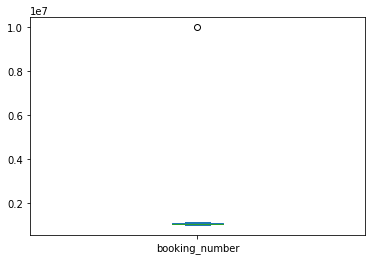

In [10]:
# Using a boxplot to look for outliers in the booking number column
hotel_evidence['booking_number'].plot(kind='box');

##It looks like we have found our first fradulent booking. The boxplot makes it easy to see that we have an outlier. Using describe() we can see that this outlier is the max value of 0.99999e+06


## Using the .loc function to locate the above identified false booking number and change the value in our indicator variable (is_false) to 1 for positive.

In [11]:
hotel_evidence.loc[hotel_evidence['booking_number'] > 9e+06, 'is_false'] = 1

In [12]:
# Verifying one false record found

hotel_evidence['is_false'].value_counts()

0    119389
1         1
Name: is_false, dtype: int64

#Investigating booking dates and looking for inconsistencies.


In [13]:
#Looking for bookings outside of the weeks in a  year. Note: some years have 53 weeks
hotel_evidence['arrival_date_week_number'].value_counts()

33.0    3580
30.0    3087
32.0    3045
34.0    3040
18.0    2926
21.0    2854
28.0    2852
17.0    2805
20.0    2785
29.0    2763
42.0    2756
31.0    2741
41.0    2699
15.0    2689
27.0    2664
25.0    2663
38.0    2661
23.0    2621
35.0    2593
39.0    2581
22.0    2546
24.0    2498
13.0    2416
16.0    2405
19.0    2402
40.0    2397
26.0    2391
43.0    2352
44.0    2272
14.0    2264
37.0    2229
8.0     2216
36.0    2167
10.0    2149
9.0     2117
7.0     2109
12.0    2083
11.0    2070
45.0    1941
53.0    1816
49.0    1781
47.0    1685
46.0    1574
6.0     1508
50.0    1505
48.0    1504
4.0     1487
5.0     1387
3.0     1319
2.0     1218
52.0    1195
1.0     1047
51.0     933
75.0       1
Name: arrival_date_week_number, dtype: int64

##We can see that we have a booking for week 75. This is another fradulent booking. 

In [14]:
# Locating false record and marking it
hotel_evidence.loc[hotel_evidence['arrival_date_week_number'] > 53, 'is_false'] = 1

In [15]:
# Verifying false record count
hotel_evidence['is_false'].value_counts()

0    119388
1         2
Name: is_false, dtype: int64

In [16]:
#Looking for inconsistencies in arrival day of month
hotel_evidence['arrival_date_day_of_month'].value_counts()

17.0    4406
5.0     4317
15.0    4196
25.0    4160
26.0    4146
9.0     4095
12.0    4087
16.0    4078
2.0     4055
19.0    4052
20.0    4032
18.0    4002
24.0    3993
28.0    3946
8.0     3921
3.0     3855
30.0    3853
6.0     3833
14.0    3819
27.0    3802
21.0    3767
4.0     3763
13.0    3745
7.0     3665
1.0     3626
23.0    3616
11.0    3599
22.0    3596
29.0    3580
10.0    3575
31.0    2209
Name: arrival_date_day_of_month, dtype: int64

In [17]:
# Using pd.crosstab to visually look for inconsistencies between arrival day of month and arrival month
pd.crosstab(hotel_evidence['arrival_date_day_of_month'], hotel_evidence['arrival_date_month'])

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_day_of_month,,,,,,,,,,,,
1.0,236,502,231,215,172,479,361,267,296,269,305,293
2.0,198,337,257,200,362,373,520,495,437,220,354,302
3.0,331,503,272,206,186,348,416,245,306,299,410,333
4.0,336,389,210,259,173,432,297,300,396,306,341,324
5.0,367,460,590,217,145,300,281,315,531,274,412,425
6.0,466,381,158,327,161,457,368,224,349,223,468,251
7.0,324,472,146,207,132,409,294,277,285,477,376,266
8.0,382,555,431,159,169,355,537,214,369,141,293,316
9.0,502,351,268,221,131,431,446,353,388,158,424,422


##Crosstab made it easy to see that there is a booking on February 31st. This is another fradulent record, as February only has 28 or sometimes 29 days.

In [18]:
# Locating the hotel record for February 31st and marking it positive for is_false.
hotel_evidence.loc[(hotel_evidence['arrival_date_month']=='February') & (hotel_evidence['arrival_date_day_of_month'] == 31), 'is_false'] = 1

In [19]:
# Verifying false record count
hotel_evidence['is_false'].value_counts()

0    119387
1         3
Name: is_false, dtype: int64

## Investigating the 'adults', 'babies', 'children' columns for discrepancies

In [19]:
#Using crosstab to check for bookings with babies staying without adults
pd.crosstab(hotel_evidence['adults'], hotel_evidence['babies'])

babies,0.0,1.0,2.0,9.0,10.0
adults,,,,,
0.0,400,3,0,0,1
1.0,23013,13,0,1,0
2.0,88792,871,15,0,0
3.0,6190,12,0,0,0
4.0,61,1,0,0,0
5.0,2,0,0,0,0
6.0,1,0,0,0,0
10.0,1,0,0,0,0
20.0,2,0,0,0,0


## We can see that there are 4 records with babies staying unaccompanied. These are fradulent records.

In [20]:
# Using crosstab again to check for children staying without adults
pd.crosstab(hotel_evidence['adults'], hotel_evidence['children'])

children,0.0,1.0,2.0,3.0,10.0
adults,,,,,
0.0,181,4,208,11,0
1.0,22587,279,157,4,0
2.0,82277,4089,3247,61,1
3.0,5675,487,39,0,0
4.0,60,2,0,0,0
5.0,2,0,0,0,0
6.0,1,0,0,0,0
10.0,1,0,0,0,0
20.0,2,0,0,0,0


## There are 223 records of children staying without adults. These are false records

In [20]:
# Locating records of babies staying unaccompanied and marking as false
hotel_evidence.loc[(hotel_evidence['adults'] == 0) & (hotel_evidence['babies'] != 0), 'is_false'] = 1

In [25]:
# Locating records of children staying unaccompanied and marking as false
hotel_evidence.loc[(hotel_evidence['adults'] == 0) & (hotel_evidence['children'] > 0), 'is_false'] = 1

In [26]:
# Verifying false record count
hotel_evidence['is_false'].value_counts()

0    119163
1       227
Name: is_false, dtype: int64

## We determined earlier that there is only 1 null in the 'adults' column. The crosstab table shows booking records with 0 adults and 0 children, and 0 adults with 0 babies. We know that rooms cannot be booked without occupants, so let's look further into the records with entries of 0  in the 'adults' column.

In [31]:
# Looking for number of records with 0 adult occupants
hotel_evidence['adults'].value_counts()

2.0     89678
1.0     23027
3.0      6202
0.0       404
4.0        62
26.0        5
27.0        2
20.0        2
5.0         2
40.0        1
50.0        1
55.0        1
6.0         1
10.0        1
Name: adults, dtype: int64

In [32]:
# Locating records with 0 adults and marking them as false records.
hotel_evidence.loc[(hotel_evidence['adults'] == 0), 'is_false'] = 1

In [33]:
#Verifying false record count
hotel_evidence['is_false'].value_counts()

0    118983
1       407
Name: is_false, dtype: int64

## Investigating stays in week nights, and stays in weekend nights columns
* All of these records are *supposed to* document stays of consecutive days.  So if someone stayed for six weekdays, they should have stayed for at least two weekend days.  If someone stayed for 3 or more weekend days, there ought to be some weekdays in there, too.


In [35]:
#Using crosstab to get a visual look at booking stays in regards to weeknight and weekend stays
pd.crosstab(hotel_evidence['stays_in_week_nights'], hotel_evidence['stays_in_weekend_nights'])

stays_in_weekend_nights,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,16.0,18.0,19.0
stays_in_week_nights,,,,,,,,,,,,,,,,,
0.0,715,4569,2361,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1.0,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,17955,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0
6.0,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0
7.0,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0
8.0,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
hotel_evidence.loc[(hotel_evidence['stays_in_week_nights'] > 5) & (hotel_evidence['stays_in_weekend_nights'] < 2), 'is_false'] =1

In [41]:
print(hotel_evidence[(hotel_evidence['stays_in_week_nights'] > 5) & (hotel_evidence['stays_in_weekend_nights'] < 2)])

             hotel  is_canceled  lead_time  arrival_date_year  \
112930  City Hotel          0.0      223.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
112930                May                      20.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
112930                       16.0                      0.0   

        stays_in_week_nights  adults  ...  days_in_waiting_list  \
112930                  11.0     2.0  ...                   0.0   

        customer_type    adr required_car_parking_spaces  \
112930      Transient  78.35                         0.0   

       total_of_special_requests reservation_status  reservation_status_date  \
112930                       1.0          Check-Out                  5/31/17   

        booking_number  total_charges is_false  
112930       1112930.0        1175.25        1  

[1 rows x 35 columns]


In [42]:
hotel_evidence['is_false'].value_counts()

0    118982
1       408
Name: is_false, dtype: int64

In [45]:
hotel_evidence.loc[(hotel_evidence['stays_in_weekend_nights'] >=3 ) & (hotel_evidence['stays_in_week_nights'] <1), 'is_false'] = 1

In [44]:
hotel_evidence['is_false'].value_counts()

0    118982
1       408
Name: is_false, dtype: int64

##The false record count did not increase by one as expected. Let's investigate further.

In [47]:
print(hotel_evidence.loc[(hotel_evidence['stays_in_weekend_nights'] >=3 ) & (hotel_evidence['stays_in_week_nights'] <1)])

             hotel  is_canceled  lead_time  arrival_date_year  \
109038  City Hotel          0.0        2.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
109038              March                      10.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
109038                        9.0                      8.0   

        stays_in_week_nights  adults  ...  days_in_waiting_list  \
109038                   0.0     0.0  ...                   0.0   

        customer_type  adr required_car_parking_spaces  \
109038      Transient  0.0                         0.0   

       total_of_special_requests reservation_status  reservation_status_date  \
109038                       0.0          Check-Out                   4/5/17   

        booking_number  total_charges is_false  
109038       1109038.0            0.0        1  

[1 rows x 35 columns]


##We can see from the output above that this record, booking number 109038 has zero adults so it has already been marked false. Therefore, our false record count did not increase.

#Investigating the money column
* The `total_charges` column *should be* equal to the average daily rate (`adr`) times (`stays_in_weekend_nights` + `stays_in_week_nights`).



In [53]:
#Re-calculate total charges by multiplying adr * (weeknight stays + weekend stays) and round to two decimal places
hotel_evidence['check'] =round(hotel_evidence['adr']* (hotel_evidence['stays_in_week_nights'] + hotel_evidence['stays_in_weekend_nights']), 2)

In [54]:
#Round hotel records total charges for comparison with calculated total charges
hotel_evidence['total_charges_rounded'] = round(hotel_evidence['total_charges'], 2)

In [55]:
#Locating records where calculated total charges does not equal hotel's total charges and marking as false
hotel_evidence.loc[hotel_evidence['check'] != hotel_evidence['total_charges_rounded'], 'is_false'] = 1

In [56]:
print(hotel_evidence[hotel_evidence['check'] != hotel_evidence['total_charges_rounded']])

               hotel  is_canceled  lead_time  arrival_date_year  \
232              NaN          NaN        NaN                NaN   
35213   Resort Hotel          0.0       11.0             2017.0   
112930    City Hotel          0.0      223.0             2017.0   
118963    City Hotel          0.0        1.0             2017.0   
119386    City Hotel          0.0      102.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
232                   NaN                       NaN   
35213               April                      15.0   
112930                May                      20.0   
118963             August                      35.0   
119386             August                      35.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
232                           NaN                      NaN   
35213                        11.0                      0.0   
112930                       16.0                      0.0   
118963            

In [57]:
hotel_evidence['is_false'].value_counts()

0    118978
1       412
Name: is_false, dtype: int64

##This value count result was also interesting. With 5 records found matching the search, the value count should have increased by 5 if they were all unique records. Upon investigation, the record associated with booking number 1112930 has two falsified elements (weekend/weekday stay discrepancy and total charges discrepancy). Therefore, the 'is_false' field only added 4 '1' values since the 'is_false' field for the weekend/weekday issue already had a value of '1'.

## Creating a subset of false records from hotel_evidence


In [58]:
# Creating a false record dataset

false_records = hotel_evidence[hotel_evidence['is_false'] == 1]

In [63]:
#Looking at the first 10 rows

false_records.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges,is_false,check,total_charges_rounded
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,292.0,1,NaN,292.0
2224,Resort Hotel,0.0,1.0,2015.0,October,41.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,Check-Out,10/6/15,1002224.0,0.0,1,0.0,0.0
2409,Resort Hotel,0.0,0.0,2015.0,October,42.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Check-Out,10/12/15,1002409.0,0.0,1,0.0,0.0
3181,Resort Hotel,0.0,36.0,2015.0,November,47.0,20.0,1.0,2.0,0.0,...,0.0,0.0,0.0,Check-Out,11/23/15,1003181.0,0.0,1,0.0,0.0
3684,Resort Hotel,0.0,165.0,2015.0,December,53.0,30.0,1.0,4.0,0.0,...,0.0,0.0,0.0,Check-Out,1/4/16,1003684.0,0.0,1,0.0,0.0
3708,Resort Hotel,0.0,165.0,2015.0,December,53.0,30.0,2.0,4.0,0.0,...,0.0,0.0,0.0,Check-Out,1/5/16,1003708.0,0.0,1,0.0,0.0
4127,Resort Hotel,1.0,0.0,2016.0,February,8.0,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Canceled,2/15/16,1004127.0,0.0,1,0.0,0.0
9376,Resort Hotel,1.0,0.0,2016.0,November,48.0,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Canceled,11/21/16,1009376.0,0.0,1,0.0,0.0
19085,Resort Hotel,0.0,11.0,2015.0,December,75.0,5.0,2.0,1.0,2.0,...,68.0,0.0,0.0,Check-Out,12/8/15,1019085.0,204.0,1,204.0,204.0
31765,Resort Hotel,0.0,31.0,2016.0,December,53.0,27.0,2.0,8.0,0.0,...,28.0,1.0,0.0,Check-Out,1/6/17,1031765.0,280.0,1,280.0,280.0


In [64]:
# Checking how many rows
false_records.shape

(412, 37)

In [67]:
#Calculating how much money was laundered with fradulent booking records
amt_laundered = false_records['total_charges'].sum()
print('The amount of money laundered was $',amt_laundered)

The amount of money laundered was $ 178830.41


In [68]:
false_records.to_excel(r'/content/howie_false_records.xlsx')

# **KEY POINTS FROM ANALYSIS:**


*   There are 412 rows of data which contain falsified data.
*   There are 414 elements of falsified data within the rows.
*   Booking #1112930 and #109038 have two elements each of false data 
*   Total money laundered: $178830.41
*   Details for each falsified record can be found in attached excel file (Howie_false_records) under tab labeled "Breakdown of False records"










